In [2]:
from loadData import loadData
from initAnalysis import initAnalysis
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np

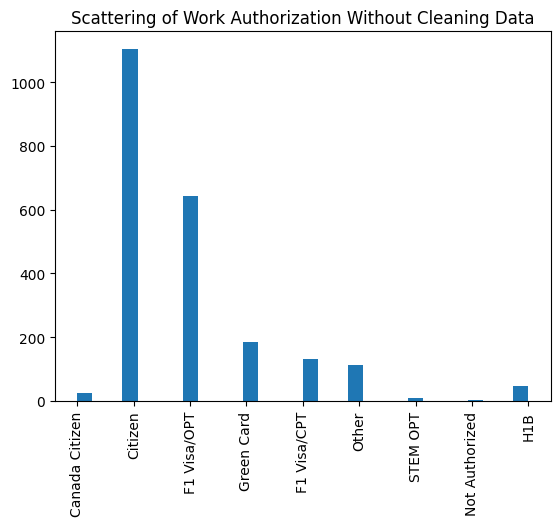

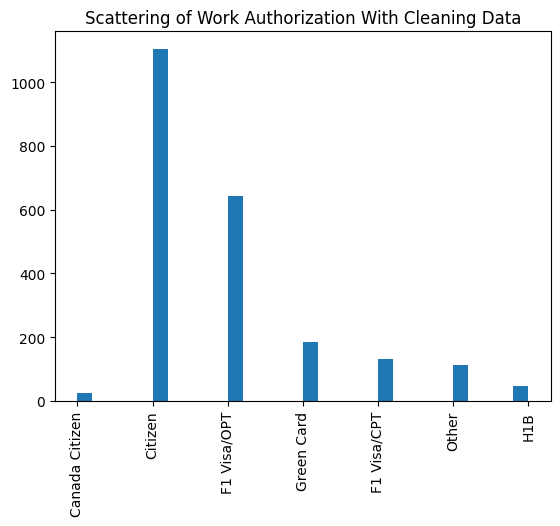

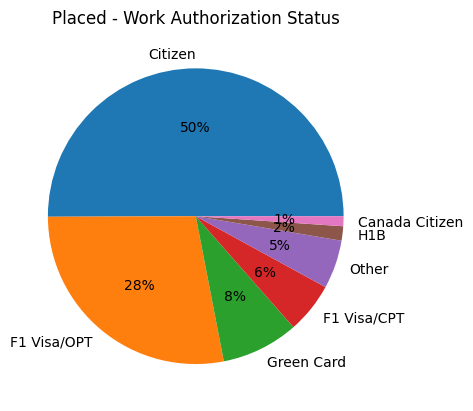

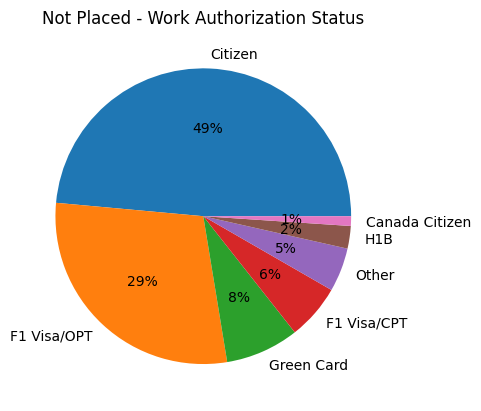

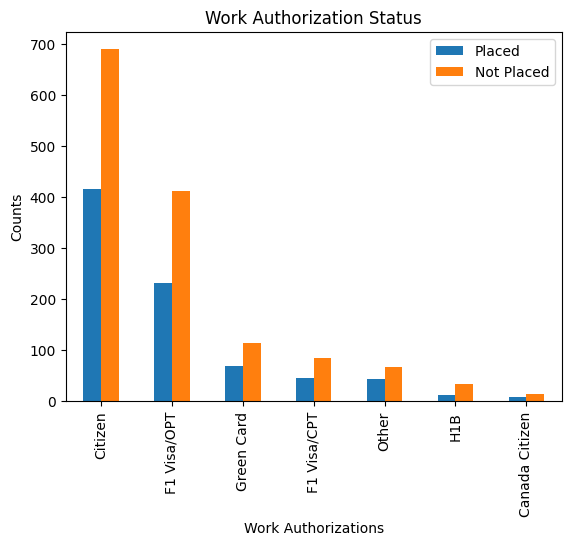

In [3]:
dataFrame = loadData()

#Prepare Data
#Cleaning Data

dataFrame = dataFrame.dropna(subset=["work_authorization_status"])
plt.title('Scattering of Work Authorization Without Cleaning Data')
plt.hist(dataFrame["work_authorization_status"],bins=30)
plt.xticks(rotation=90)
plt.show()

dataFrame["work_authorization_status"] = dataFrame["work_authorization_status"].replace("STEM OPT", np.nan)
dataFrame["work_authorization_status"] = dataFrame["work_authorization_status"].replace("Not Authorized", np.nan)
dataFrame = dataFrame.dropna(subset=["work_authorization_status"])
plt.title('Scattering of Work Authorization With Cleaning Data')
plt.hist(dataFrame["work_authorization_status"],bins=30)
plt.xticks(rotation=90)
plt.show() 

#End Prepare Data
#End Cleaning Data


targetPlaced, dataPlaced, targetNotPlaced, dataNotPlaced = initAnalysis(dataFrame)

workAuthorizationStatusPlaced = dataPlaced["work_authorization_status"]
workAuthorizationStatusNotPlaced = dataNotPlaced["work_authorization_status"]


workAuthorizationStatusPlaced.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Placed - Work Authorization Status')
plt.show()


workAuthorizationStatusNotPlaced.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Not Placed - Work Authorization Status')
plt.ylabel('')
plt.show()



workAuthorizationStatusPlaced = workAuthorizationStatusPlaced.value_counts()
workAuthorizationStatusNotPlaced = workAuthorizationStatusNotPlaced.value_counts()


combinedDataFrame = pd.DataFrame({
    'Placed': workAuthorizationStatusPlaced,
    'Not Placed': workAuthorizationStatusNotPlaced
})

combinedDataFrame.plot(kind='bar')

plt.xlabel('Work Authorizations')
plt.ylabel('Counts')
plt.title('Work Authorization Status')
plt.show()
